In [1]:
import sys
import gpytorch
import numpy as np
import pandas as pd
import torch
from datetime import datetime
from scipy.stats import qmc
import itertools
from itertools import combinations_with_replacement, combinations, permutations

import bo_methods_lib
from bo_methods_lib.bo_methods_lib.GPBO_Classes_New import * #Fix this later
from bo_methods_lib.bo_methods_lib.GPBO_Class_fxns import * #Fix this later
from bo_methods_lib.bo_methods_lib.analyze_data import * #Fix this later
from bo_methods_lib.bo_methods_lib.GPBO_Classes_plotters import * #Fix this later
import pympler
import pickle
import signac

from pympler import asizeof

from matplotlib import pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

#Ignore inconcistent version warning
import warnings
# from sklearn.exceptions import InconsistentVersionWarning
# warnings.filterwarnings(action='ignore', category=InconsistentVersionWarning)

/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
#From signac
import signac
meth_name_val_list = [1, 2, 3, 4, 5, 6]

criteria_dict = {"cs_name_val" : 1,
                 "ep_enum_val": {"$gte": 1},
                 "meth_name_val": {"$in": meth_name_val_list}}

criteria_dict = {"cs_name_val" : 1,
                 "ep_enum_val": 1,
                 "meth_name_val": {"$in": meth_name_val_list}}

criteria_dict = {"cs_name_val" : 17,
                 "param_name_str":{"$exists": False},
                 "meth_name_val": {"$in": [1,2,3,5,6]}}

project = signac.get_project()
save_csv = False
save_figs = False
analyzer = General_Analysis(criteria_dict, project, save_csv)
plotters = Plotters(analyzer, save_figs)

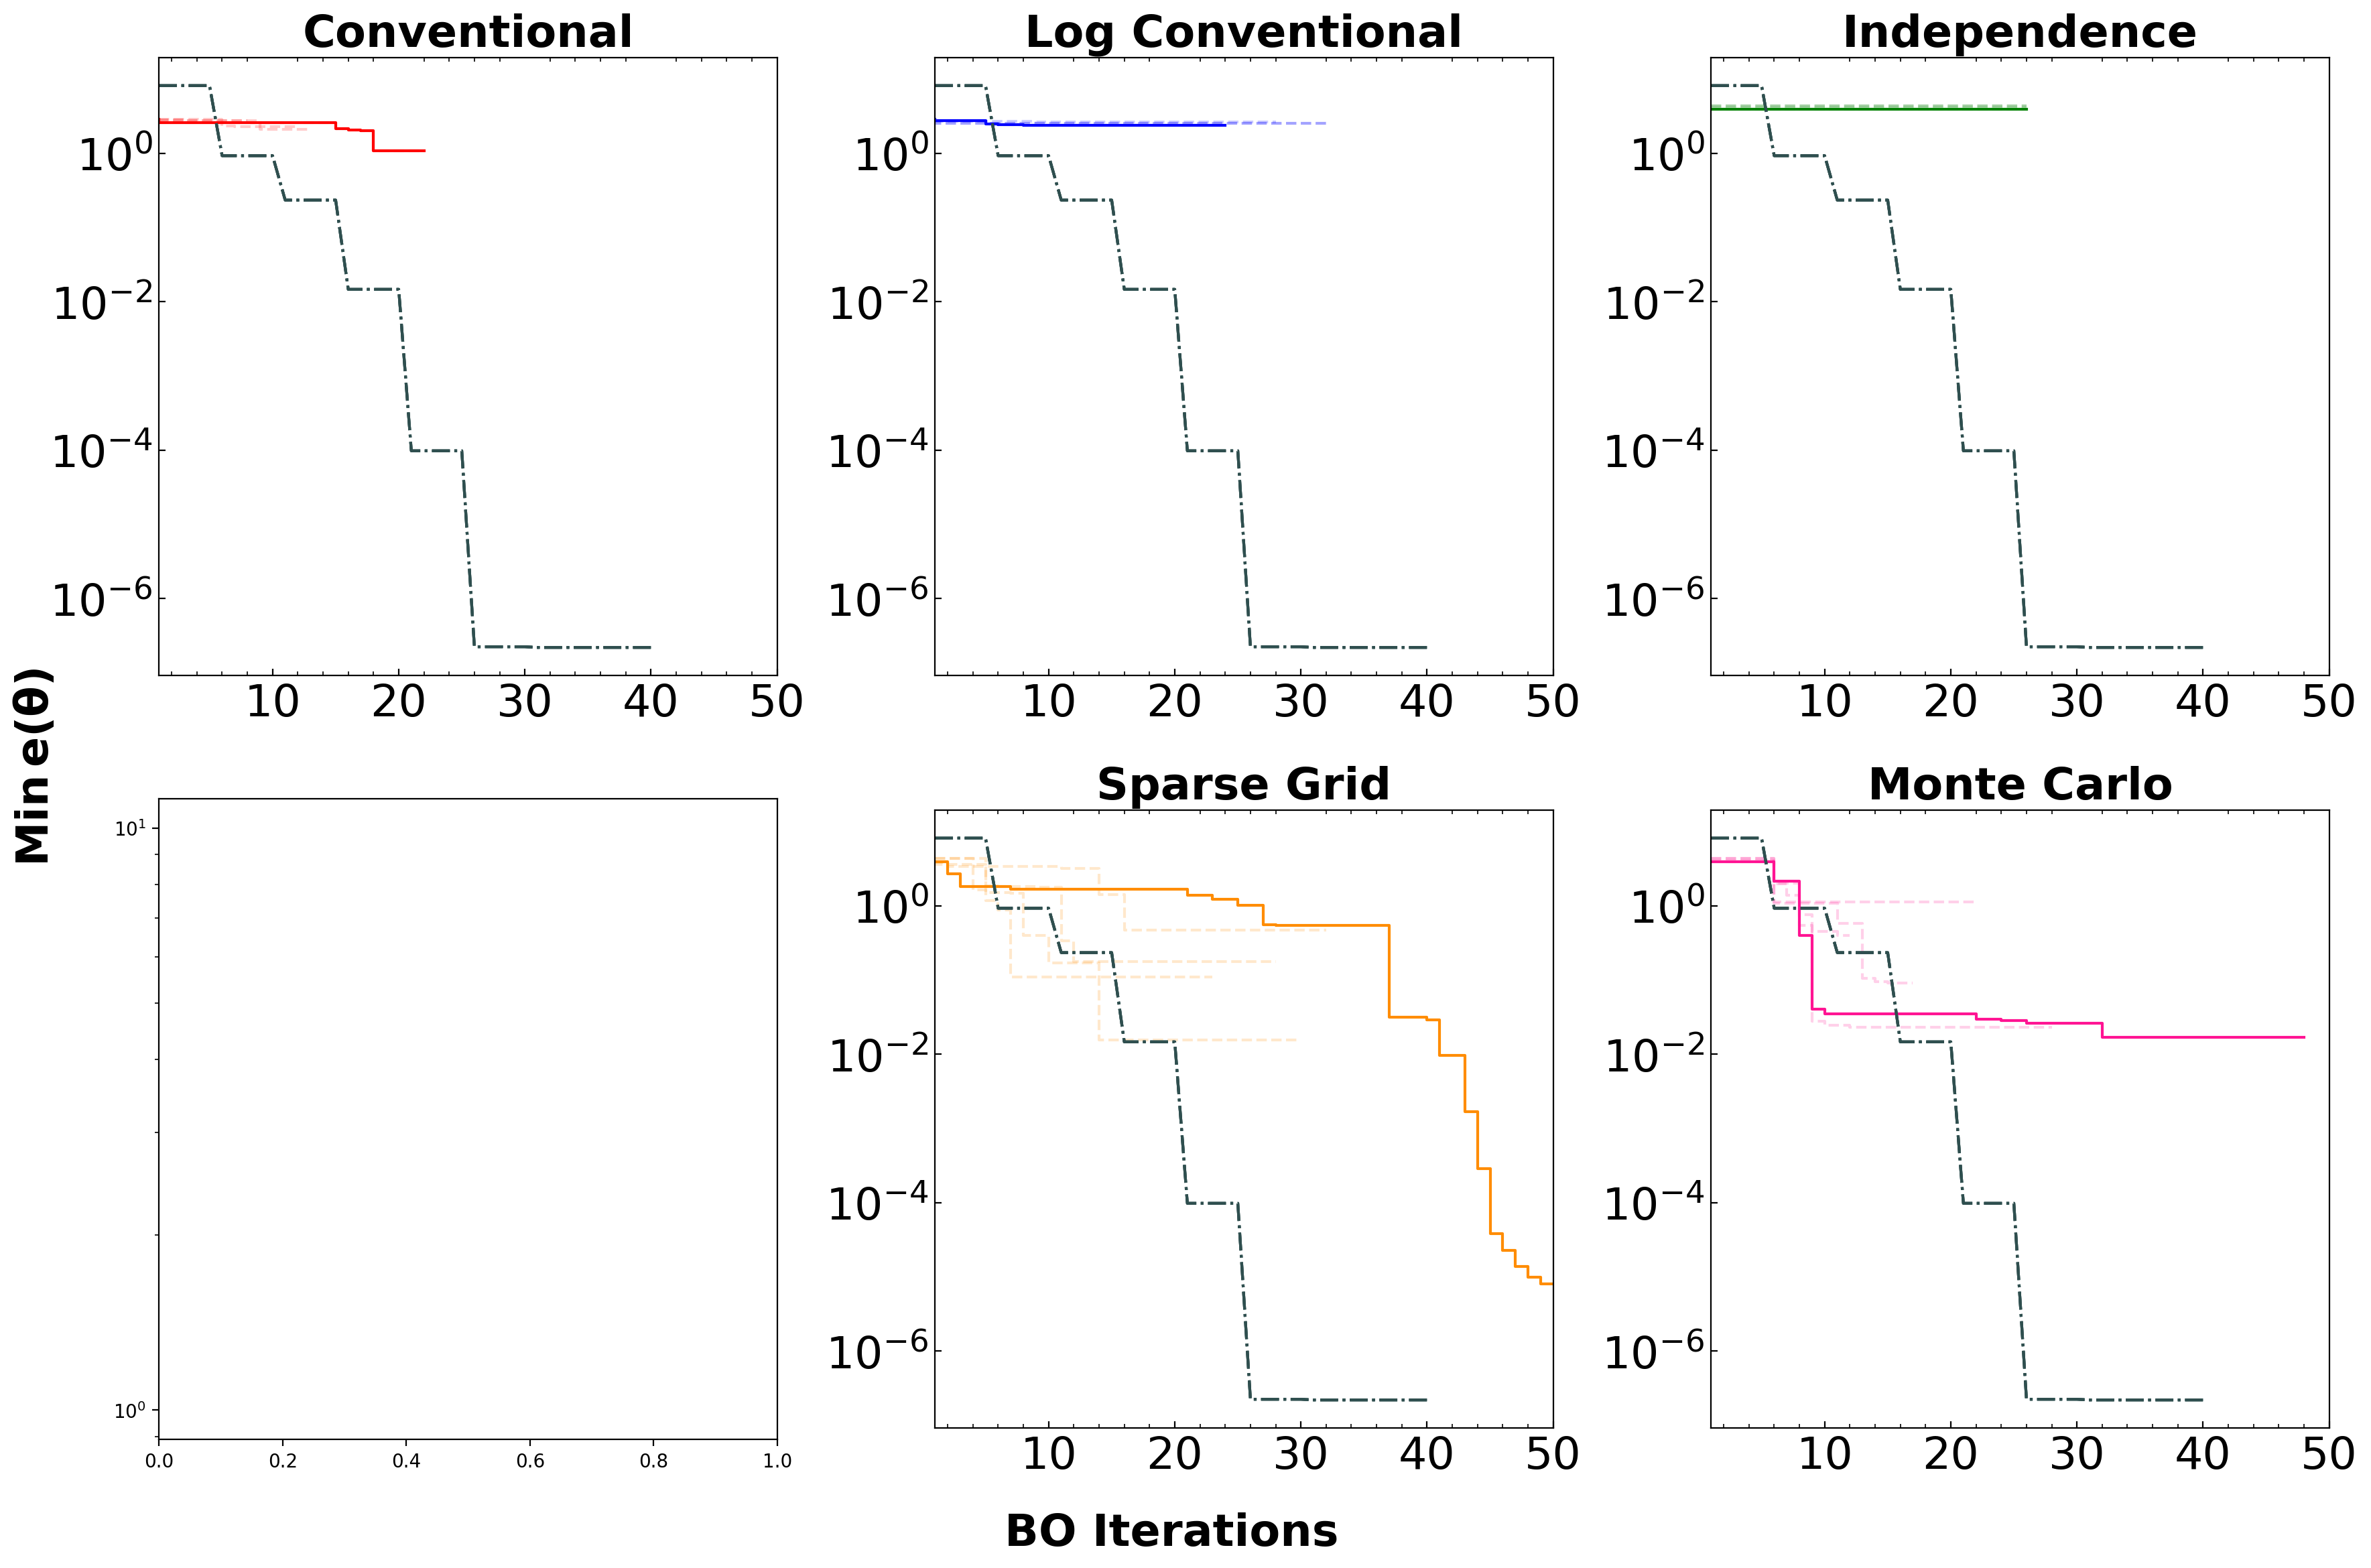

In [9]:
plotters.plot_one_obj_all_methods("min_sse")

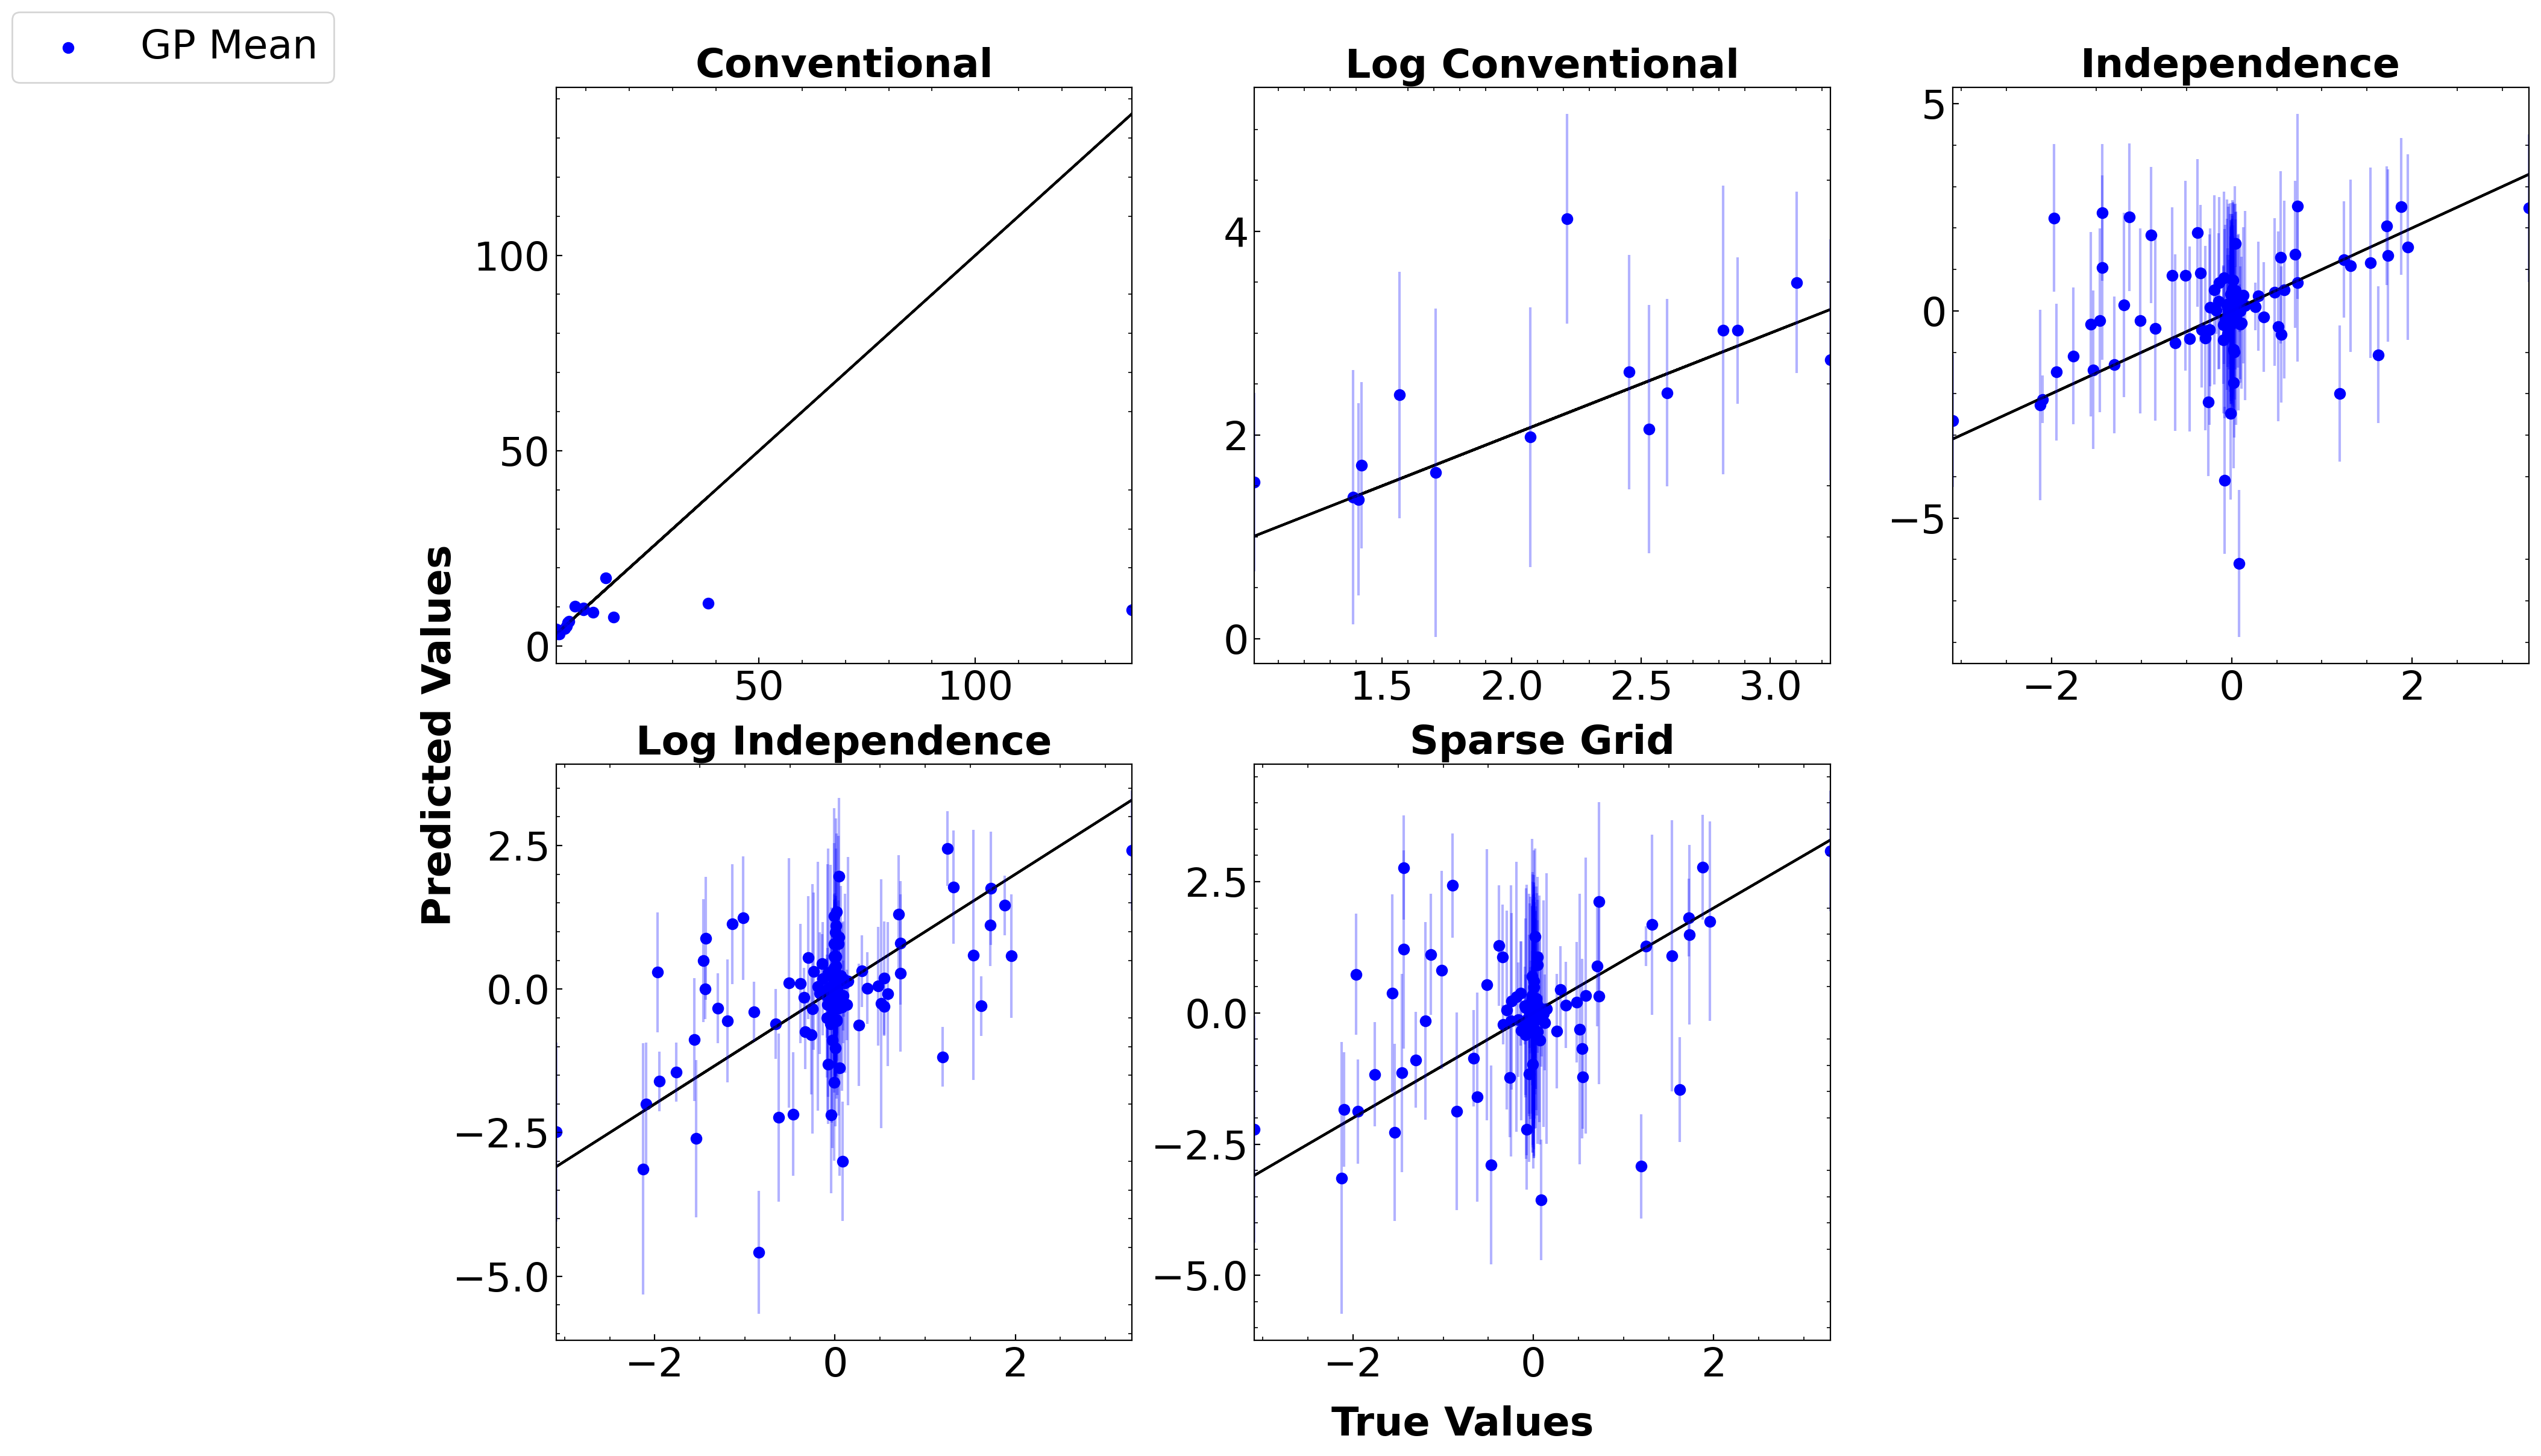

In [10]:
plotters.make_parity_plots()

In [11]:

# df_all_jobs, job_list, theta_true = analyzer.get_df_all_jobs()
df_best, job_list_best = analyzer.get_best_data()

for i in range(len(job_list_best)): 
    print(job_list_best[i].id)
    
df_best

5faec289a820f756b4d4d2a29968152c
2d2b53a6aef4d184faf2636b78059028
3c2ba178a279f4ada843c703f8f09ff4
88a517c667d8e4b605165f253f780ad7
13fd43bcfece4b5b3c479a969e41a179


,Run Number,BO Iter,Best Error,Exploration Bias,Max EI,Theta Max EI,Min Obj,Min Obj Act,Theta Min Obj,Min Obj Cum.,...,Speed,Time/Iter,EP Method Val,MSE,BO Method,Job ID,Max Evals,Termination,Total Run Time,L2 Norm Theta
328,4,19,2.026677,1.0,1.225493e-06,"[0.21960789784653512, -0.061987610695160456, 3...",1.922665,1.082773,"[3.2122578536134756, -0.42713250283964843, 5.0...",1.082773,...,0.028318,5.766703,CONSTANT,1.082773e-01,A1,5faec289a820f756b4d4d2a29968152c,22,ei-regret,126.867469,5.907477
160,2,9,0.940598,1.0,1.364931e-01,"[0.4587290985310884, 0.1, 0.0, 0.0]",0.978373,0.873006,"[2.1746275198559926, -0.5442461154782291, 0.61...",0.873006,...,0.455024,11.341898,CONSTANT,2.394098e-01,B1,2d2b53a6aef4d184faf2636b78059028,24,obj-regret,272.205557,5.579914
236,1,1,2.561512,1.0,4.359180e+00,"[2.2664962479437336, -0.2866350754546061, 0.0,...",1.204716,3.901980,"[4.100397623017211, -0.621258421243731, 2.4543...",3.90198,...,inf,77.680193,CONSTANT,3.901980e-01,A2,3c2ba178a279f4ada843c703f8f09ff4,26,obj,2019.685023,4.868549
432,2,50,0.001717,1.0,1.150312e-02,"[2.972062977290277, -0.20216819504335726, 0.99...",0.000004,0.000008,"[3.002776352520974, -0.2004825766761965, 1.000...",0.000008,...,0.000041,120.543948,CONSTANT,8.044407e-07,C2,88a517c667d8e4b605165f253f780ad7,50,max_budget,6027.197385,6.283521
112,2,33,0.153267,1.0,1.979607e-07,"[3.7835238287216866, -0.25183169820769713, 1.0...",0.004401,0.016876,"[3.1083732290297394, -0.19948396821965655, 1.0...",0.016876,...,0.001292,84.150527,CONSTANT,1.687578e-03,D2,13fd43bcfece4b5b3c479a969e41a179,48,obj-regret,4039.225285,6.330496


In [ ]:
plotters.plot_hypers(job_list_best[1], title = None)

In [ ]:
ls_analyzer = LS_Analysis(criteria_dict, project, save_csv)
ls_results = ls_analyzer.least_squares_analysis()
ls_results
ls_results.sort_values(by=['Min Obj Cum.', 'Iter'], ascending=True)
# ls_results[ls_results["Run"] == 1]

In [ ]:
plotters.plot_objs_all_methods(["min_sse", "sse"])

In [ ]:
plotters.plot_thetas(job_list_best[0], "min_sse", title = None)

In [ ]:
# title = "Heat Map Pair " + z_choice
levels = [100, 100, 100, 100, 100, 100]
pair = 0
z_choice = "sse_mean"
plotters.plot_hms_all_methods(pair, z_choice, levels, log_data = False, title = None)

In [ ]:
levels = [100, 100, 100, 100]
pair = 0
z_choice = ["sse_sim", "sse_mean", "sse_var", "ei"]
plotters.plot_hms_gp_compare(job_list_best[0], df_best["Run Number"].iloc[0], df_best["BO Iter"].iloc[0], 
                             pair, z_choice, levels, log_data = False, title = None)

In [ ]:
#Make Heat maps for all pairs
z_choices = ["sse_sim", "sse_mean", "sse_var", "ei"]
levels = [100,100,100,100]

#Loop over best jobs
for i in range(len(job_list_best)):   
    #Get jobs, runs, and iters to examine
    job = job_list_best[i]
    run_num = df_best["Run Number"].iloc[i]
    bo_iter = df_best["BO Iter"].iloc[i]
    
    #Back out number of parameters
    string_val = df_best["Theta Min Obj"].iloc[0]
    try:
        numbers = [float(num) for num in string_val.replace('[', '').replace(']', '').split()]
    except:
        numbers = [float(num) for num in string_val]
        
    #Create list of parameter pair combinations
    dim_theta = len(np.array(numbers).reshape(-1, 1))
    dim_list = np.linspace(0, dim_theta-1, dim_theta)
    pairs = len((list(combinations(dim_list, 2))))
    
    #Loop over parameter pairs
    for pair in range(pairs):
        plotters.plot_hms_gp_compare(job, run_num, bo_iter, pair, z_choices, levels)